In [2]:
import pickle
import os
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from Helpers.Grae import get_GRAE_networks, BaseDataset


In [3]:

"""
This script pulls in one of Marshall's embeddings to validate how well it predicts the test points embedded by GRAE
"""

import sys
sys.path.append('/yunity/msn39/ADNI-Modeling-Dashboard')  # Update this path accordingly
import ADNI_Dataset_Class


# Define the path to the pickle file
file_path = os.path.join('Datasets', 'Embeddings', 'your_pickle_file.pkl')

# Load the pickle files for a profile/tau set
folder = "/yunity/msn39/ADNI-Modeling-Dashboard/Datasets/Embeddings/MASH_Profile Variables 2025-01-03-06-35_LAST_DX_DX_bl_use_rf_proximities_selection-ADNI3_2025-Feb-25-@-05-54_Tau Variables 2025-02-20-21-22_LAST_DX_DX_bl_use_rf_proximities_selection-ADNI3_2025-Feb-25-@-05-42_2025-Feb-26-@-12-10"
with open(folder + '/class_object.pkl', 'rb') as file:
    mash_object = pickle.load(file)
with open(folder + '/domain_object_1.pkl', 'rb') as file:
    domain_1_object = pickle.load(file)
with open(folder + '/domain_object_2.pkl', 'rb') as file:
    domain_2_object = pickle.load(file)

In [4]:
good_looks = mash_object.emb

In [5]:
domain_1_object.labels

3       2.0
5       2.0
6       2.0
7       1.0
9       1.0
       ... 
1553    2.0
1557    2.0
1558    1.0
1560    2.0
1561    2.0
Name: LAST_DX, Length: 1071, dtype: float64

In [6]:
domain_1_object.dataset_accuracy

0.4897959183673469

In [7]:
X_train = mash_object.emb
y_train = pd.concat([domain_1_object.labels, domain_2_object.labels])  # Resets index after appending

# Train a Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

scores = cross_val_score(model, X_train, y_train, cv=3)

print(scores)

domain_1_dataset_score = domain_1_object.dataset_accuracy
domain_1_distances_score = domain_1_object.distances_accuracy
domain_2_dataset_score = domain_2_object.dataset_accuracy
domain_2_distances_score = domain_2_object.distances_accuracy
manifold_oob = mash_object.get_scores(labels=y_train, n_jobs=-1)


"""
# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")

# 🚀 Predict on new embedded points (future data)
X_new = ...  # Replace with new 2D embedded points
y_new_pred = clf.predict(X_new)
print("Predicted labels for new points:", y_new_pred)
"""


[0.54149086 0.59295775 0.65211268]


'\n# Predict on the test set\ny_pred = model.predict(X_test)\n\n# Evaluate accuracy\naccuracy = accuracy_score(y_test, y_pred)\nprint(f"Test Accuracy: {accuracy:.4f}")\n\n# 🚀 Predict on new embedded points (future data)\nX_new = ...  # Replace with new 2D embedded points\ny_new_pred = clf.predict(X_new)\nprint("Predicted labels for new points:", y_new_pred)\n'

In [8]:
domain_1_object.data

array([[7.69000000e+01, 1.72000000e+02, 1.39250411e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [7.09000000e+01, 2.31000000e+02, 1.08333478e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [7.29000000e+01,            nan,            nan, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [           nan,            nan,            nan, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [           nan,            nan,            nan, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [7.48000000e+01,            nan,            nan, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00]])

In [9]:
graeA, graeB = get_GRAE_networks(domain_1_object.data, domain_2_object.data, mash_object.emb, n_comp = 2, 
                  anchors = mash_object.known_anchors, labelsA = domain_1_object.labels, labelsB = domain_2_object.labels)

In [18]:
domain_1_object.data.shape

(1071, 76)

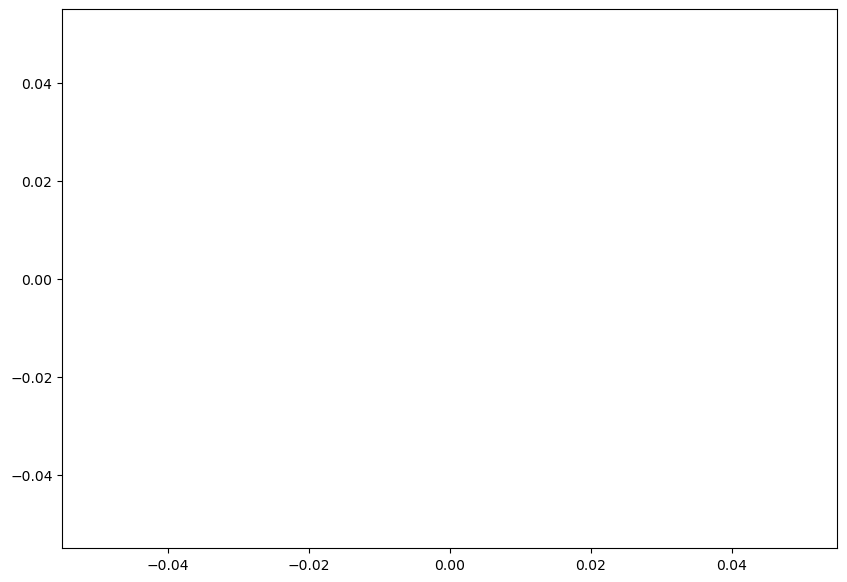

In [15]:
X_train_grae = BaseDataset(domain_1_object.data, np.array(domain_1_object.labels), split="none", split_ratio=0.8, random_state=42)
graeA.plot(X_train_grae)